Class 0: 573518
Class 1: 21694
Proportion: 26.44 :1


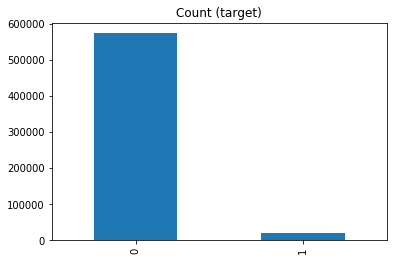

In [20]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train.csv')

target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ':1')

target_count.plot(kind='bar', title='Count (target)');

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# idとtargetカラムを取り除く
labels = df_train.columns[2:]

X = df_train[labels]
y = df_train['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 96.36%


In [24]:
model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 96.36%


Confusion matrix:
 [[114709      0]
 [  4334      0]]


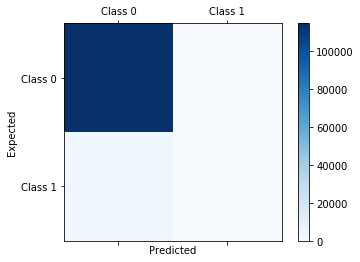

In [26]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


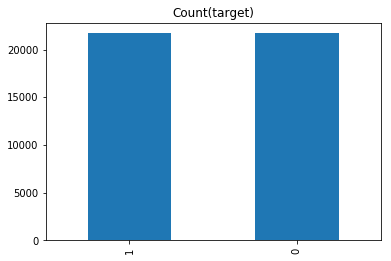

In [28]:
count_class_0, count_class_1 = df_train.target.value_counts()

df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

# Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1],axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title= 'Count(target)');

Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


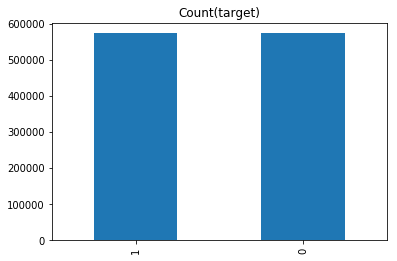

In [30]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over],axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title= 'Count(target)');

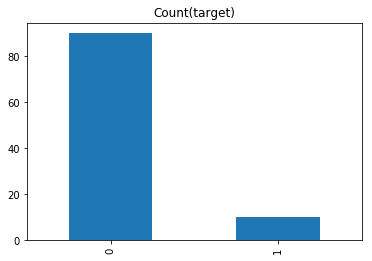

In [32]:
import imblearn

from sklearn.datasets import make_classification

X,y = make_classification(n_classes=2, class_sep=1.5, weights=[0.9,0.1],n_informative=3, n_redundant=1, flip_y=0, n_features=20,n_clusters_per_class=1,n_samples=100, random_state=10)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count(target)');

In [38]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
        X[y==l, 0],
        X[y==l, 1],
        c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

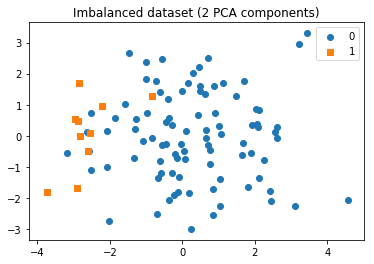

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [68 55 80 19 18 52 57 88  7 31  4  8  9 14 16 40 67 70 71 74]


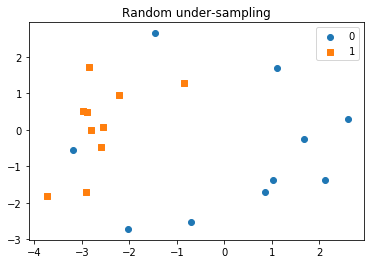

In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus , y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


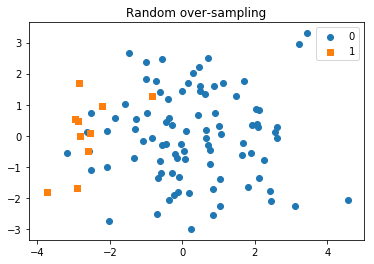

In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros , y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


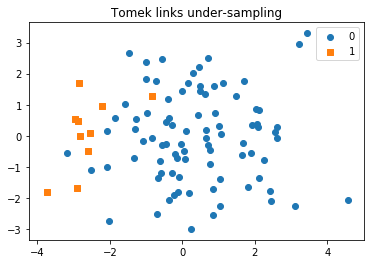

In [46]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices = True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X,y)
print('Removed indexes:' , id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

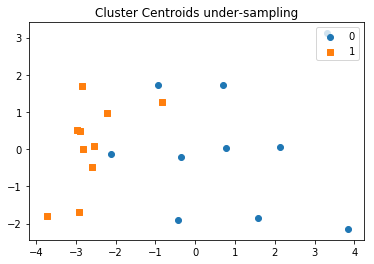

In [51]:
from imblearn.under_sampling import ClusterCentroids

# 多いほうの残す数をratioで調整
cc = ClusterCentroids(ratio={0:10})
X_cc, y_cc = cc.fit_sample(X,y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

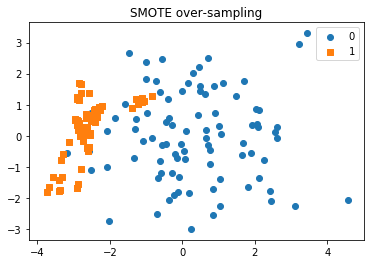

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

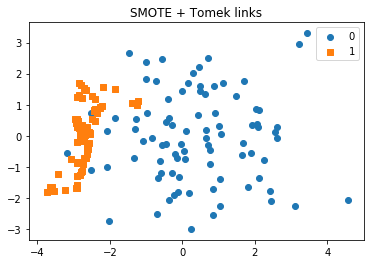

In [48]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')